## Deep learning on Be heart Smart

In [41]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sqlalchemy import create_engine
# Import Username,Password and Database_name
from config import Username,Password,DBname
print("All neccessary libraries imported")

All neccessary libraries imported


## Creating Connection to Be Heart Smart Db

In [42]:
# The create_engine() function produces an Engine object based on a URL
engine = create_engine('postgresql+psycopg2://postgres:'+ Password + '@localhost:5432/' + DBname)
connection = engine.connect()

In [43]:
# Create cardio dataframe from cardio data cleaned table in the database
cardio_complete_df = pd.read_sql("SELECT * FROM cardio_complete",connection)
cardio_complete_df.head()

,id,age,gender,height,weight,systolic_bp,diastolic_bp,cholesterol,glucose,smoker,alcohol_intake,active,cardio_disease,bmi,weight_status,obesity_status
0,26503.0,49.0,1.0,160.0,30.0,120.0,80.0,1.0,1.0,0.0,0.0,1.0,1.0,11.7,underweight,no
1,54851.0,59.0,1.0,154.0,32.0,110.0,60.0,1.0,1.0,0.0,0.0,1.0,0.0,13.5,underweight,no
2,21040.0,62.0,1.0,143.0,34.0,100.0,70.0,1.0,1.0,0.0,0.0,1.0,0.0,16.6,underweight,no
3,47872.0,57.0,1.0,153.0,34.0,110.0,70.0,3.0,3.0,0.0,0.0,1.0,1.0,14.5,underweight,no
4,23318.0,59.0,1.0,165.0,35.0,100.0,70.0,1.0,1.0,0.0,0.0,1.0,0.0,12.9,underweight,no


In [3]:
# Read the cardio data to a dataframe
path = ('../Resources/cardio_cleaned.csv')
cardio_df = pd.read_csv(path)  
cardio_df.head()

,id,Age,gender,height,weight,systolic_bp,diastolic_bp,cholesterol,glucose,smoker,alcohol_intake,active,cardio_disease
0,86650,51,1,171.0,29.0,110.0,70.0,2,1,0,0,1,1
1,26503,49,1,160.0,30.0,120.0,80.0,1,1,0,0,1,1
2,59853,58,1,143.0,30.0,103.0,61.0,2,1,0,0,1,0
3,24167,47,2,170.0,31.0,150.0,90.0,2,2,0,0,1,1
4,31439,42,1,146.0,32.0,100.0,70.0,1,1,0,0,0,0


In [4]:
# Read the BMI data to a dataframe
path = ('../Resources/BMI.csv')
BMI_df = pd.read_csv(path)  
BMI_df.head()

,id,BMI,weight_status,obesity_status
0,86650,9.9,underweight,no
1,26503,11.7,underweight,no
2,59853,14.7,underweight,no
3,24167,10.7,underweight,no
4,31439,15.0,underweight,no


In [5]:
# Merge the two DataFrames on id.
cardio_complete_df = pd.merge(cardio_df, BMI_df, on="id")
cardio_complete_df.head()

,id,Age,gender,height,weight,systolic_bp,diastolic_bp,cholesterol,glucose,smoker,alcohol_intake,active,cardio_disease,BMI,weight_status,obesity_status
0,86650,51,1,171.0,29.0,110.0,70.0,2,1,0,0,1,1,9.9,underweight,no
1,26503,49,1,160.0,30.0,120.0,80.0,1,1,0,0,1,1,11.7,underweight,no
2,59853,58,1,143.0,30.0,103.0,61.0,2,1,0,0,1,0,14.7,underweight,no
3,24167,47,2,170.0,31.0,150.0,90.0,2,2,0,0,1,1,10.7,underweight,no
4,31439,42,1,146.0,32.0,100.0,70.0,1,1,0,0,0,0,15.0,underweight,no


In [6]:
print(cardio_complete_df.shape)
print(cardio_complete_df.dtypes)

(68297, 16)
id                  int64
Age                 int64
gender              int64
height            float64
weight            float64
systolic_bp       float64
diastolic_bp      float64
cholesterol         int64
glucose             int64
smoker              int64
alcohol_intake      int64
active              int64
cardio_disease      int64
BMI               float64
weight_status      object
obesity_status     object
dtype: object


In [7]:
# Re-aarange columns in the merged DataFrame
rearranged_columns = ["id", "Age", "gender", "height", "weight", "BMI", "weight_status", "obesity_status", 
                       "systolic_bp", "diastolic_bp", "cholesterol", "glucose", "smoker", "alcohol_intake", 
                       "active", "cardio_disease"]
cardio_complete_df = cardio_complete_df[rearranged_columns]
cardio_complete_df.head()

,id,Age,gender,height,weight,BMI,weight_status,obesity_status,systolic_bp,diastolic_bp,cholesterol,glucose,smoker,alcohol_intake,active,cardio_disease
0,86650,51,1,171.0,29.0,9.9,underweight,no,110.0,70.0,2,1,0,0,1,1
1,26503,49,1,160.0,30.0,11.7,underweight,no,120.0,80.0,1,1,0,0,1,1
2,59853,58,1,143.0,30.0,14.7,underweight,no,103.0,61.0,2,1,0,0,1,0
3,24167,47,2,170.0,31.0,10.7,underweight,no,150.0,90.0,2,2,0,0,1,1
4,31439,42,1,146.0,32.0,15.0,underweight,no,100.0,70.0,1,1,0,0,0,0


In [8]:
cardio_complete_df.describe()

,id,Age,gender,height,weight,BMI,systolic_bp,diastolic_bp,cholesterol,glucose,smoker,alcohol_intake,active,cardio_disease
count,68297.000000,68297.000000,68297.000000,68297.000000,68297.000000,68297.000000,68297.000000,68297.000000,68297.000000,68297.000000,68297.000000,68297.000000,68297.000000,68297.000000
mean,49972.437969,52.819304,1.348375,164.452070,74.072282,27.420065,126.351538,81.215983,1.363383,1.225134,0.087778,0.053165,0.803549,0.493272
std,28851.286589,6.771405,0.476459,7.820924,14.254568,5.184147,16.067301,9.262086,0.678032,0.571167,0.282974,0.224364,0.397316,0.499958
min,0.000000,29.000000,1.000000,135.000000,29.000000,9.900000,80.000000,40.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,24994.000000,48.000000,1.000000,159.000000,65.000000,23.900000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50017.000000,53.000000,1.000000,165.000000,72.000000,26.300000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74868.000000,58.000000,2.000000,170.000000,82.000000,30.100000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,64.000000,2.000000,207.000000,200.000000,85.800000,180.000000,120.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
# Change the continuous variables weight_status, and obesity_status from string to numeric.
# Defining a function string_to_numeric.
def string_to_numeric(variable):
    if variable == "underweight":
        return 1
    elif variable == "normal":
        return 2
    elif variable == "overweight":
        return 3
    else:
        return 4

In [10]:
# Call the function string_to_numeric on column weight_status 
cardio_complete_df["weight_status"] = cardio_complete_df["weight_status"].apply(string_to_numeric)
cardio_complete_df.head()

# Change the obesity_status to numeric
cardio_complete_df["obesity_status"] = cardio_complete_df["obesity_status"].apply(lambda x: 1 if x == "yes" else 0)

In [11]:
cardio_complete_df.head(10)

,id,Age,gender,height,weight,BMI,weight_status,obesity_status,systolic_bp,diastolic_bp,cholesterol,glucose,smoker,alcohol_intake,active,cardio_disease
0,86650,51,1,171.0,29.0,9.9,1,0,110.0,70.0,2,1,0,0,1,1
1,26503,49,1,160.0,30.0,11.7,1,0,120.0,80.0,1,1,0,0,1,1
2,59853,58,1,143.0,30.0,14.7,1,0,103.0,61.0,2,1,0,0,1,0
3,24167,47,2,170.0,31.0,10.7,1,0,150.0,90.0,2,2,0,0,1,1
4,31439,42,1,146.0,32.0,15.0,1,0,100.0,70.0,1,1,0,0,0,0
5,50443,54,1,146.0,32.0,15.0,1,0,130.0,80.0,1,2,0,0,0,0
6,54851,59,1,154.0,32.0,13.5,1,0,110.0,60.0,1,1,0,0,1,0
7,68667,52,1,143.0,33.0,16.1,1,0,100.0,60.0,1,1,0,0,1,0
8,21040,62,1,143.0,34.0,16.6,1,0,100.0,70.0,1,1,0,0,1,0
9,47872,57,1,153.0,34.0,14.5,1,0,110.0,70.0,3,3,0,0,1,1


In [12]:
cardio_complete_df.sample(10)

,id,Age,gender,height,weight,BMI,weight_status,obesity_status,systolic_bp,diastolic_bp,cholesterol,glucose,smoker,alcohol_intake,active,cardio_disease
5606,92513,39,2,169.0,57.0,20.0,2,0,110.0,70.0,1,1,0,0,1,0
2578,76681,56,1,156.0,53.0,21.8,2,0,130.0,90.0,1,1,0,0,1,1
56271,37112,59,2,171.0,78.0,26.7,3,0,130.0,70.0,3,3,0,0,0,1
51291,15859,55,2,170.0,62.0,21.5,2,0,120.0,80.0,1,1,0,1,1,0
30072,5992,59,2,163.0,63.0,23.7,2,0,140.0,80.0,1,1,0,0,0,1
55474,15757,55,1,170.0,103.0,35.6,4,1,120.0,80.0,3,1,0,0,1,1
57988,98395,59,2,172.0,80.0,27.0,3,0,130.0,90.0,1,1,0,0,1,0
47645,75131,55,1,168.0,81.0,28.7,3,0,120.0,80.0,2,1,0,0,1,0
63175,63875,54,2,176.0,72.0,23.2,2,0,130.0,80.0,1,1,1,0,1,0
38531,26264,57,1,165.0,74.0,27.2,3,0,120.0,80.0,2,2,0,0,0,1


In [47]:
cardio_complete_df["obesity_status"].value_counts()

no     47209
yes    21088
Name: obesity_status, dtype: int64

## Pre processing data for Neural Network

In [13]:
# Drop the non-beneficial ID , height columns.
cardio_processed_df = cardio_complete_df.drop(["id","height"], axis =1)
cardio_processed_df.head()

,Age,gender,weight,BMI,weight_status,obesity_status,systolic_bp,diastolic_bp,cholesterol,glucose,smoker,alcohol_intake,active,cardio_disease
0,51,1,29.0,9.9,1,0,110.0,70.0,2,1,0,0,1,1
1,49,1,30.0,11.7,1,0,120.0,80.0,1,1,0,0,1,1
2,58,1,30.0,14.7,1,0,103.0,61.0,2,1,0,0,1,0
3,47,2,31.0,10.7,1,0,150.0,90.0,2,2,0,0,1,1
4,42,1,32.0,15.0,1,0,100.0,70.0,1,1,0,0,0,0


In [14]:
# Split our preprocessed data into our features and target arrays
X = cardio_processed_df.drop(["cardio_disease"],1).values
y = cardio_processed_df["cardio_disease"].values
# Split the preprocessed data into a training and testing dataset
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 78)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(51222, 13)
(17075, 13)
(51222,)
(17075,)


In [15]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [66]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  500
hidden_nodes_layer2 = 300
hidden_nodes_layer3 = 100
hidden_nodes_layer4 = 50
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu")
)

# Third hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu")
)

# Fourth hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="relu")
)

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 500)               7000      
_________________________________________________________________
dense_11 (Dense)             (None, 300)               150300    
_________________________________________________________________
dense_12 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_13 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 51        
Total params: 192,501
Trainable params: 192,501
Non-trainable params: 0
_________________________________________________________________


In [67]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [68]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)


Epoch 1/100
1601/1601 [==============================] - 3s 1ms/step - loss: 0.5561 - accuracy: 0.7265
Epoch 2/100
1601/1601 [==============================] - 3s 2ms/step - loss: 0.5491 - accuracy: 0.7325
Epoch 3/100
1601/1601 [==============================] - 2s 1ms/step - loss: 0.5470 - accuracy: 0.7319
Epoch 4/100
1601/1601 [==============================] - 2s 1ms/step - loss: 0.5458 - accuracy: 0.7333
Epoch 5/100
1601/1601 [==============================] - 3s 2ms/step - loss: 0.5443 - accuracy: 0.7347
Epoch 6/100
1601/1601 [==============================] - 2s 2ms/step - loss: 0.5427 - accuracy: 0.7346
Epoch 7/100
1601/1601 [==============================] - 2s 1ms/step - loss: 0.5424 - accuracy: 0.7361
Epoch 8/100
1601/1601 [==============================] - 3s 2ms/step - loss: 0.5418 - accuracy: 0.7358
Epoch 9/100
1601/1601 [==============================] - 2s 1ms/step - loss: 0.5413 - accuracy: 0.7362
Epoch 10/100
1601/1601 [==============================] - 2s 1ms/step - l

<AxesSubplot:>

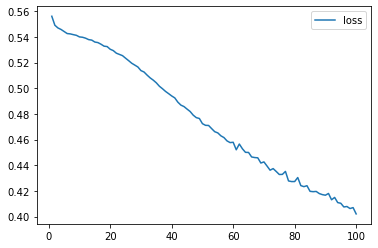

In [69]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

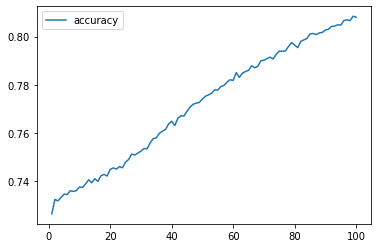

In [70]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [71]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {(model_loss):.3f}, Accuracy: {(model_accuracy):.3f}")

534/534 - 0s - loss: 1.1123 - accuracy: 0.7064
Loss: 1.112, Accuracy: 0.706


## "The accuracy of this model is 71.0% after adding additional neurons to each of the 4 hidden layers"

## Trial 2

In [73]:
# Defining the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 500
hidden_nodes_layer2 = 300
hidden_nodes_layer3 = 100
hidden_nodes_layer4 = 50
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu")
)

# Third hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu")
)

# Fourth hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="relu")
)

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 500)               7000      
_________________________________________________________________
dense_21 (Dense)             (None, 300)               150300    
_________________________________________________________________
dense_22 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_23 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 51        
Total params: 192,501
Trainable params: 192,501
Non-trainable params: 0
_________________________________________________________________


In [74]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [75]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=200)

Epoch 1/200
1601/1601 [==============================] - 2s 1ms/step - loss: 0.5559 - accuracy: 0.7284
Epoch 2/200
1601/1601 [==============================] - 2s 2ms/step - loss: 0.5497 - accuracy: 0.7303
Epoch 3/200
1601/1601 [==============================] - 2s 1ms/step - loss: 0.5472 - accuracy: 0.7330
Epoch 4/200
1601/1601 [==============================] - 2s 1ms/step - loss: 0.5455 - accuracy: 0.7333
Epoch 5/200
1601/1601 [==============================] - 2s 2ms/step - loss: 0.5444 - accuracy: 0.7352
Epoch 6/200
1601/1601 [==============================] - 2s 1ms/step - loss: 0.5437 - accuracy: 0.7347
Epoch 7/200
1601/1601 [==============================] - 3s 2ms/step - loss: 0.5428 - accuracy: 0.7349
Epoch 8/200
1601/1601 [==============================] - 3s 2ms/step - loss: 0.5419 - accuracy: 0.7354
Epoch 9/200
1601/1601 [==============================] - 2s 1ms/step - loss: 0.5413 - accuracy: 0.7364
Epoch 10/200
1601/1601 [==============================] - 2s 1ms/step - l

1601/1601 [==============================] - 2s 1ms/step - loss: 0.3566 - accuracy: 0.8330
Epoch 158/200
1601/1601 [==============================] - 2s 1ms/step - loss: 0.3504 - accuracy: 0.8332
Epoch 159/200
1601/1601 [==============================] - 2s 1ms/step - loss: 0.3564 - accuracy: 0.8331
Epoch 160/200
1601/1601 [==============================] - 2s 1ms/step - loss: 0.3532 - accuracy: 0.8329
Epoch 161/200
1601/1601 [==============================] - 2s 1ms/step - loss: 0.3605 - accuracy: 0.8319
Epoch 162/200
1601/1601 [==============================] - 2s 1ms/step - loss: 0.3508 - accuracy: 0.8343
Epoch 163/200
1601/1601 [==============================] - 2s 1ms/step - loss: 0.3525 - accuracy: 0.8343
Epoch 164/200
1601/1601 [==============================] - 2s 2ms/step - loss: 0.3535 - accuracy: 0.8351
Epoch 165/200
1601/1601 [==============================] - 3s 2ms/step - loss: 0.3509 - accuracy: 0.8353
Epoch 166/200
1601/1601 [==============================] - 2s 1ms/ste

In [76]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {(model_loss):.3f}, Accuracy: {(model_accuracy):.3f}")

534/534 - 0s - loss: 1.6407 - accuracy: 0.6959
Loss: 1.641, Accuracy: 0.696


## The accuracy is 70% after adding additional neurons to the 4 hidden layers and epoch of 200. This looks like a classic case of overfitting.

### Trial 3 with 5 hidden layers and optimizer as "rmsprop"

In [34]:
# Defining the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 700
hidden_nodes_layer2 = 500
hidden_nodes_layer3 = 200
hidden_nodes_layer4 = 100
hidden_nodes_layer5 = 50
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu")
)

# Third hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu")
)

# Fourth hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="relu")
)

# Fifth hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer5, activation="relu")
)

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 700)               9800      
_________________________________________________________________
dense_13 (Dense)             (None, 500)               350500    
_________________________________________________________________
dense_14 (Dense)             (None, 200)               100200    
_________________________________________________________________
dense_15 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_16 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 101       
Total params: 490,801
Trainable params: 490,801
Non-trainable params: 0
________________________________________________

In [79]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer ="rmsprop", metrics=["accuracy"])

In [80]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
1601/1601 [==============================] - 8s 5ms/step - loss: 0.5603 - accuracy: 0.7258
Epoch 2/100
1601/1601 [==============================] - 8s 5ms/step - loss: 0.5528 - accuracy: 0.7307
Epoch 3/100
1601/1601 [==============================] - 8s 5ms/step - loss: 0.5507 - accuracy: 0.7317
Epoch 4/100
1601/1601 [==============================] - 8s 5ms/step - loss: 0.5487 - accuracy: 0.7336
Epoch 5/100
1601/1601 [==============================] - 8s 5ms/step - loss: 0.5482 - accuracy: 0.7331
Epoch 6/100
1601/1601 [==============================] - 8s 5ms/step - loss: 0.5469 - accuracy: 0.7340
Epoch 7/100
1601/1601 [==============================] - 7s 5ms/step - loss: 0.5462 - accuracy: 0.7355
Epoch 8/100
1601/1601 [==============================] - 7s 5ms/step - loss: 0.5464 - accuracy: 0.7349
Epoch 9/100
1601/1601 [==============================] - 7s 5ms/step - loss: 0.5460 - accuracy: 0.7352
Epoch 10/100
1601/1601 [==============================] - 8s 5ms/step - l

In [81]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {(model_loss):.3f}, Accuracy: {(model_accuracy):.3f}")

534/534 - 0s - loss: 0.5834 - accuracy: 0.7310
Loss: 0.583, Accuracy: 0.731


## "The accuracy of this model is 73.0% after adding additional neurons to each of the 5 hidden layers"

## Trial 4: Output with softmax

In [54]:
# Defining the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 700
hidden_nodes_layer2 = 500
hidden_nodes_layer3 = 200
hidden_nodes_layer4 = 100
hidden_nodes_layer5 = 50
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu")
)

# Third hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu")
)

# Fourth hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="relu")
)

# Fifth hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer5, activation="relu")
)

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="softmax"))

# Check the structure of the model
nn.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 700)               9800      
_________________________________________________________________
dense_25 (Dense)             (None, 500)               350500    
_________________________________________________________________
dense_26 (Dense)             (None, 200)               100200    
_________________________________________________________________
dense_27 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_28 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 51        
Total params: 485,701
Trainable params: 485,701
Non-trainable params: 0
________________________________________________

In [17]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer ="rmsprop", metrics=["accuracy"])

In [18]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
1601/1601 [==============================] - 8s 5ms/step - loss: 0.5609 - accuracy: 0.4919
Epoch 2/100
1601/1601 [==============================] - 7s 4ms/step - loss: 0.5523 - accuracy: 0.4919
Epoch 3/100
1601/1601 [==============================] - 7s 4ms/step - loss: 0.5491 - accuracy: 0.4919
Epoch 4/100
1601/1601 [==============================] - 7s 4ms/step - loss: 0.5485 - accuracy: 0.4919
Epoch 5/100
1601/1601 [==============================] - 7s 4ms/step - loss: 0.5470 - accuracy: 0.4919
Epoch 6/100
1601/1601 [==============================] - 7s 5ms/step - loss: 0.5467 - accuracy: 0.4919
Epoch 7/100
1601/1601 [==============================] - 7s 5ms/step - loss: 0.5456 - accuracy: 0.4919
Epoch 8/100
1601/1601 [==============================] - 8s 5ms/step - loss: 0.5459 - accuracy: 0.4919
Epoch 9/100
1601/1601 [==============================] - 8s 5ms/step - loss: 0.5462 - accuracy: 0.4919
Epoch 10/100
1601/1601 [==============================] - 7s 5ms/step - l

In [19]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {(model_loss):.3f}, Accuracy: {(model_accuracy):.3f}")

534/534 - 0s - loss: 0.5751 - accuracy: 0.4975
Loss: 0.575, Accuracy: 0.497


In [37]:
from ann_visualizer.visualize import ann_viz;
from graphviz import Source

In [49]:
ann_viz(nn,title ="Trial 3 Neural network")

## Activation Sigmoid, output sigmoid

In [55]:
# Defining the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 700
hidden_nodes_layer2 = 500
hidden_nodes_layer3 = 200
hidden_nodes_layer4 = 100
hidden_nodes_layer5 = 50
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="sigmoid")
)

# Third hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="sigmoid")
)

# Fourth hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="sigmoid")
)

# Fifth hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer5, activation="sigmoid")
)

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 700)               9800      
_________________________________________________________________
dense_31 (Dense)             (None, 500)               350500    
_________________________________________________________________
dense_32 (Dense)             (None, 200)               100200    
_________________________________________________________________
dense_33 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_34 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 51        
Total params: 485,701
Trainable params: 485,701
Non-trainable params: 0
________________________________________________

In [51]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer ="rmsprop", metrics=["accuracy"])

In [52]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
1601/1601 [==============================] - 9s 5ms/step - loss: 0.5596 - accuracy: 0.7230
Epoch 2/100
1601/1601 [==============================] - 8s 5ms/step - loss: 0.5505 - accuracy: 0.7308
Epoch 3/100
1601/1601 [==============================] - 8s 5ms/step - loss: 0.5485 - accuracy: 0.7329
Epoch 4/100
1601/1601 [==============================] - 8s 5ms/step - loss: 0.5469 - accuracy: 0.7339
Epoch 5/100
1601/1601 [==============================] - 8s 5ms/step - loss: 0.5467 - accuracy: 0.7340
Epoch 6/100
1601/1601 [==============================] - 8s 5ms/step - loss: 0.5463 - accuracy: 0.7338
Epoch 7/100
1601/1601 [==============================] - 8s 5ms/step - loss: 0.5456 - accuracy: 0.7357
Epoch 8/100
1601/1601 [==============================] - 8s 5ms/step - loss: 0.5451 - accuracy: 0.7348
Epoch 9/100
1601/1601 [==============================] - 8s 5ms/step - loss: 0.5447 - accuracy: 0.7360
Epoch 10/100
1601/1601 [==============================] - 8s 5ms/step - l

In [53]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {(model_loss):.3f}, Accuracy: {(model_accuracy):.3f}")

534/534 - 1s - loss: 0.6510 - accuracy: 0.7136
Loss: 0.651, Accuracy: 0.714


## The best accuracy is obtained with 5 hidden layers, activation: relu , output:sigmoid and optimizer ="rmsprop"

In [65]:
# Defining the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 700
hidden_nodes_layer2 = 500
hidden_nodes_layer3 = 200
hidden_nodes_layer4 = 100
hidden_nodes_layer5 = 50
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu")
)

# Third hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu")
)

# Fourth hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="relu")
)

# Fifth hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer5, activation="relu")
)

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 700)               9800      
_________________________________________________________________
dense_43 (Dense)             (None, 500)               350500    
_________________________________________________________________
dense_44 (Dense)             (None, 200)               100200    
_________________________________________________________________
dense_45 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_46 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_47 (Dense)             (None, 1)                 51        
Total params: 485,701
Trainable params: 485,701
Non-trainable params: 0
________________________________________________

In [57]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer ="rmsprop", metrics=["accuracy"])

In [58]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
1601/1601 [==============================] - 8s 5ms/step - loss: 0.5605 - accuracy: 0.7264
Epoch 2/100
1601/1601 [==============================] - 8s 5ms/step - loss: 0.5526 - accuracy: 0.7308
Epoch 3/100
1601/1601 [==============================] - 8s 5ms/step - loss: 0.5498 - accuracy: 0.7331
Epoch 4/100
1601/1601 [==============================] - 8s 5ms/step - loss: 0.5487 - accuracy: 0.7332
Epoch 5/100
1601/1601 [==============================] - 7s 5ms/step - loss: 0.5476 - accuracy: 0.7341
Epoch 6/100
1601/1601 [==============================] - 7s 5ms/step - loss: 0.5470 - accuracy: 0.7348
Epoch 7/100
1601/1601 [==============================] - 7s 5ms/step - loss: 0.5469 - accuracy: 0.7336
Epoch 8/100
1601/1601 [==============================] - 7s 5ms/step - loss: 0.5464 - accuracy: 0.7350
Epoch 9/100
1601/1601 [==============================] - 7s 5ms/step - loss: 0.5462 - accuracy: 0.7344
Epoch 10/100
1601/1601 [==============================] - 7s 5ms/step - l

In [60]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {(model_loss):.3f}, Accuracy: {(model_accuracy):.3f}")

534/534 - 0s - loss: 0.5967 - accuracy: 0.7309
Loss: 0.597, Accuracy: 0.731


<AxesSubplot:>

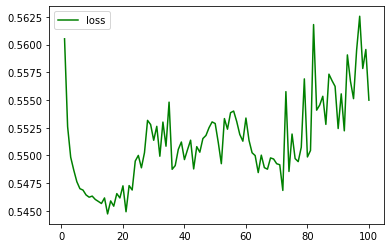

In [64]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss",color='green')

<AxesSubplot:>

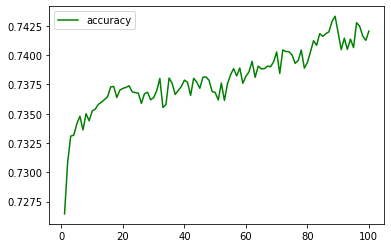

In [63]:
# Plot the accuracy
history_df.plot(y="accuracy",color='green')

In [66]:
ann_viz(nn,title ="Be Heart Smart Neural Network Model")